In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [4]:
filepath = "F:\Computer Programming\Python-dev\HistoricalQuotes.csv"
df = pd.read_csv(filepath)

In [5]:
df.describe()

,Close/Last,Open,High,Low
count,2519.000000,2519.000000,2519.000000,2519.000000
mean,69.159107,69.180762,70.074184,68.190742
std,23.957121,23.934155,23.969377,23.860927
min,-37.630000,-37.250000,-35.200000,-40.320000
25%,49.175000,49.160000,49.900000,48.390000
50%,61.900000,61.900000,62.740000,61.130000
75%,93.485000,93.490000,94.425000,92.575000
max,113.930000,113.450000,114.180000,113.050000


In [6]:
#list(df.columns.values)
df.rename({" Close/Last" : "Close", " Volume" : "Volume", " Open" : "Open", " High" : "High", " Low" : "Low"}, 
         axis = "columns", inplace = True)
#df.dtypes
df.replace(" N/A", np.nan, inplace = True)
'''
missing_data = df.isnull()
missing_data.head(10)
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")'''
df = df.dropna()
df["Volume"] = df["Volume"].astype(float)
df.dtypes
#list(df.columns.values)

Date       object
Close     float64
Volume    float64
Open      float64
High      float64
Low       float64
dtype: object

In [8]:
x = df[["High", "Low", "Open", "Volume"]].values
y = df["Close"].values
#print(type(x))

<class 'numpy.ndarray'>


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [8]:
regressor = LinearRegression()

In [9]:
regressor.fit(x_train, y_train)

LinearRegression()

In [10]:
print(regressor.coef_)

[ 7.69953616e-01  7.86164431e-01 -5.55479216e-01 -1.18582985e-07]


In [11]:
print(regressor.intercept_)

0.06594358988132853


In [12]:
predicted = regressor.predict(x_test)

In [13]:
print(predicted)

[ 46.9984147   44.60665711  68.6450359   54.03395744  86.28951124
  53.17920788  50.885341    95.18341979  93.34735412 106.38202314
  55.75532473  50.73110772  42.52681207  52.52765271  65.21973499
  56.27310434  94.17010583  71.32447183  97.78003526  49.55462155
  43.59964269  95.04293734  92.46033377  59.48287708  64.5385882
  44.56069676  56.50855451  62.44400602  48.34181162  45.41250317
  45.97946084 104.85514873  38.15273035 106.0714575   84.91617028
  48.8516928   65.99876104  37.87414943  52.72941385  30.14002321
  58.57472229  62.45925309  98.39562817  97.39383844  99.8315239
  82.01721903  78.8287938   52.94784912  50.0410971  100.35751501
  99.00241448 100.98983734  38.11837216 101.10696072 106.75659918
  70.04500487  49.32698032  92.78006203  98.48862928  63.54295256
  91.3661298   30.99608911  97.90718122  53.5206478   51.32573549
 104.87318256  90.8243346   59.83966299 100.78140963  97.38058139
 100.70181104  81.19023517  93.08769951  60.99433239 102.54905611
  95.5569052

In [14]:
dframe = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": predicted.flatten()})

In [15]:
dframe.head(20)

,Actual,Predicted
0,47.07,46.998415
1,43.98,44.606657
2,67.89,68.645036
3,53.54,54.033957
4,86.80,86.289511
5,53.20,53.179208
6,50.44,50.885341
7,95.01,95.183420
8,93.65,93.347354
9,106.53,106.382023


In [16]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predicted))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predicted))
print("Root Mean Squared Error:", math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error: 0.37792777844527636
Mean Squared Error: 0.26261788936406033
Root Mean Squared Error: 0.5124625736227577


In [17]:
graph = dframe.head(20)

<AxesSubplot:>

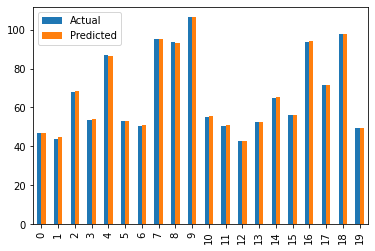

In [18]:
#dframe.plot(kind = "bar")
graph.plot(kind = "bar")

In [ ]:
#pct-change